# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv("data/IRIS.csv")

# Explore Data

In [3]:
# show the first 5 rows of dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Show the last 5 rows of dataset
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Shape of Data

In [5]:
print(f"Iris Dataset Shape (Rows, Columns): {df.shape}")

Iris Dataset Shape (Rows, Columns): (150, 5)


## Columns

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**sepal_length** Iris flowers Sepal Length measurement</br>
**sepal_width** Iris flowers Sepal Width measurement</br>
**petal_length** Iris flowers Petal Length measurement</br>
**petal_width** Iris flowers Petal Width measurement</br>
</br>
**species** is the class(Target) variable indicating Iris flower specie.

## Data Types

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

All the **features** are **numerical** and **species** is **Categorical**.

## Describe Data

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Preprocess Data

## Missing Values

In [10]:
# show missing values in each column
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**No** missing values. Data is already **Cleaned**.

## Features Distribution

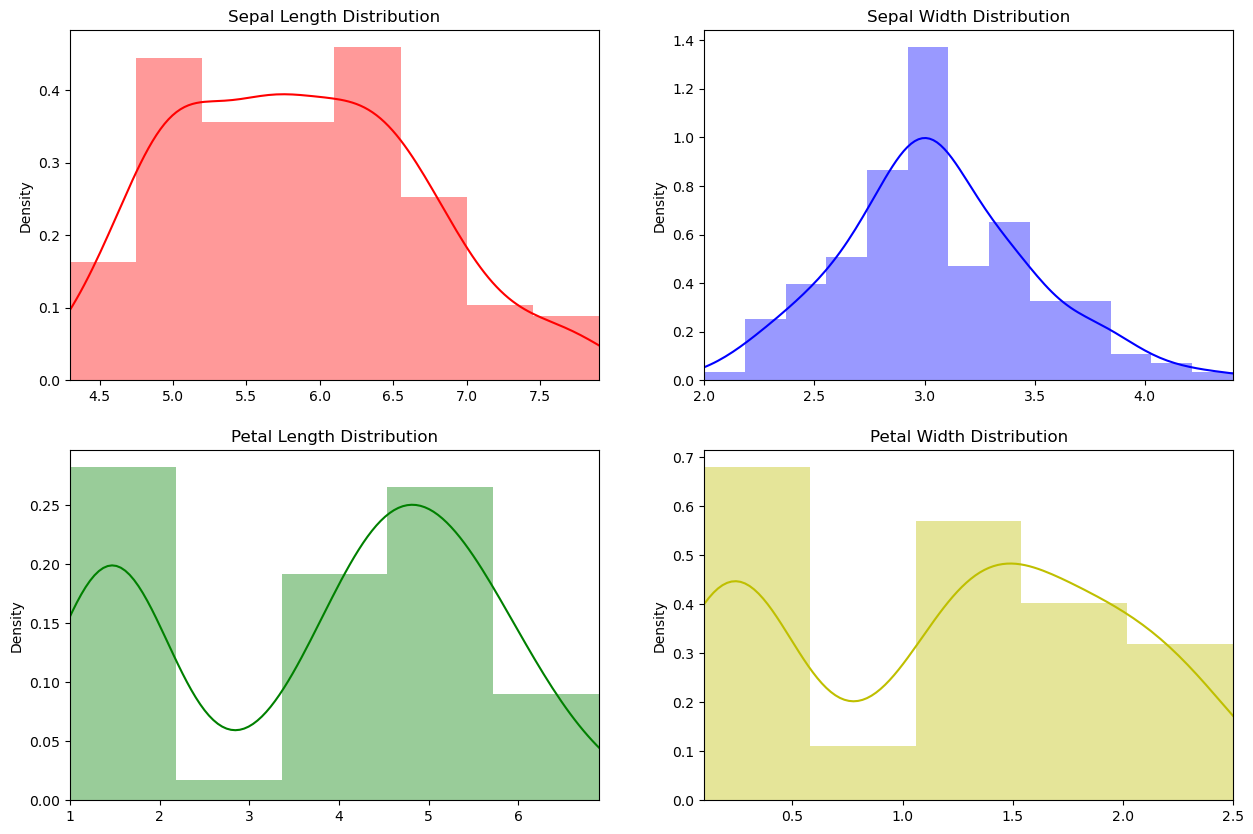

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sepal_length = df['sepal_length'].values
sepal_width = df['sepal_width'].values
petal_length = df['petal_length'].values
petal_width = df['petal_width'].values

sns.distplot(sepal_length, ax=ax[0, 0], color='r')
ax[0, 0].set_title('Sepal Length Distribution')
ax[0, 0].set_xlim([df['sepal_length'].min(), df['sepal_length'].max()])

sns.distplot(sepal_width, ax=ax[0, 1], color='b')
ax[0, 1].set_title('Sepal Width Distribution')
ax[0, 1].set_xlim([df['sepal_width'].min(), df['sepal_width'].max()])

sns.distplot(petal_length, ax=ax[1, 0], color='g')
ax[1, 0].set_title('Petal Length Distribution')
ax[1, 0].set_xlim([df['petal_length'].min(), df['petal_length'].max()])

sns.distplot(petal_width, ax=ax[1, 1], color='y')
ax[1, 1].set_title('Petal Width Distribution')
ax[1, 1].set_xlim([df['petal_width'].min(), df['petal_width'].max()])

plt.show()

Features need to be scaled as Petal length and width are not normal.

## Species (Classes) Distribution

In [12]:
print("Distribution of Iris Flower Species is:")
print(df['species'].value_counts())

Distribution of Iris Flower Species is:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


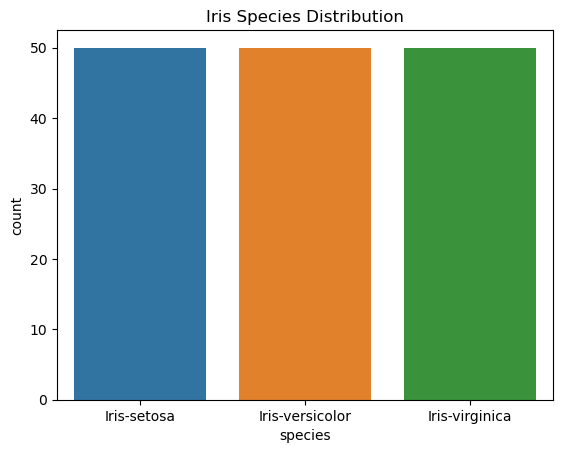

In [13]:
sns.countplot(data=df, x='species')
plt.title("Iris Species Distribution");

## Analysis by Sepal

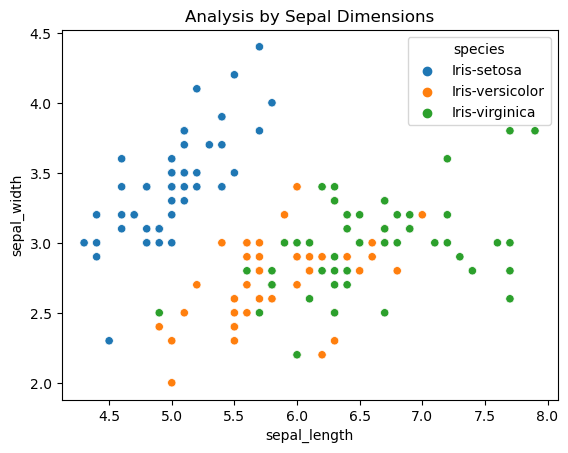

In [14]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title("Analysis by Sepal Dimensions");

### Insights
- we can easily separate **Iris-setosa** by sepal length and width from others.
- **Iris-versicolor** and **Iris-virginica** are not leanirly separable.

## Analysis by Petal

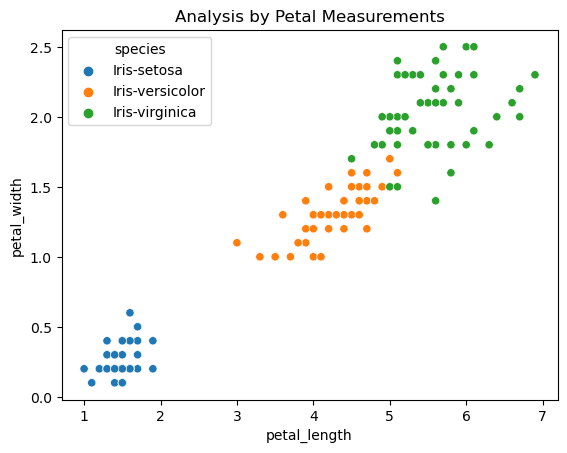

In [15]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.title('Analysis by Petal Measurements');

### Insights
- All three class are easily separable by both petal length and petal width.
- **Iris-setosa:**</br>
    petal_length < 2 </br>
    petal_width < 0.8
- **Iris-versicolor:** </br> 
    petal_length > 2.5 and petal_length < 5 </br> 
    petal_width > 0.8 and petal_width < 1.7
- **Iris-virginica:**</br>
    petal_length > 5 </br>
    petal_width > 1.7

## Plot Scatter Matrix

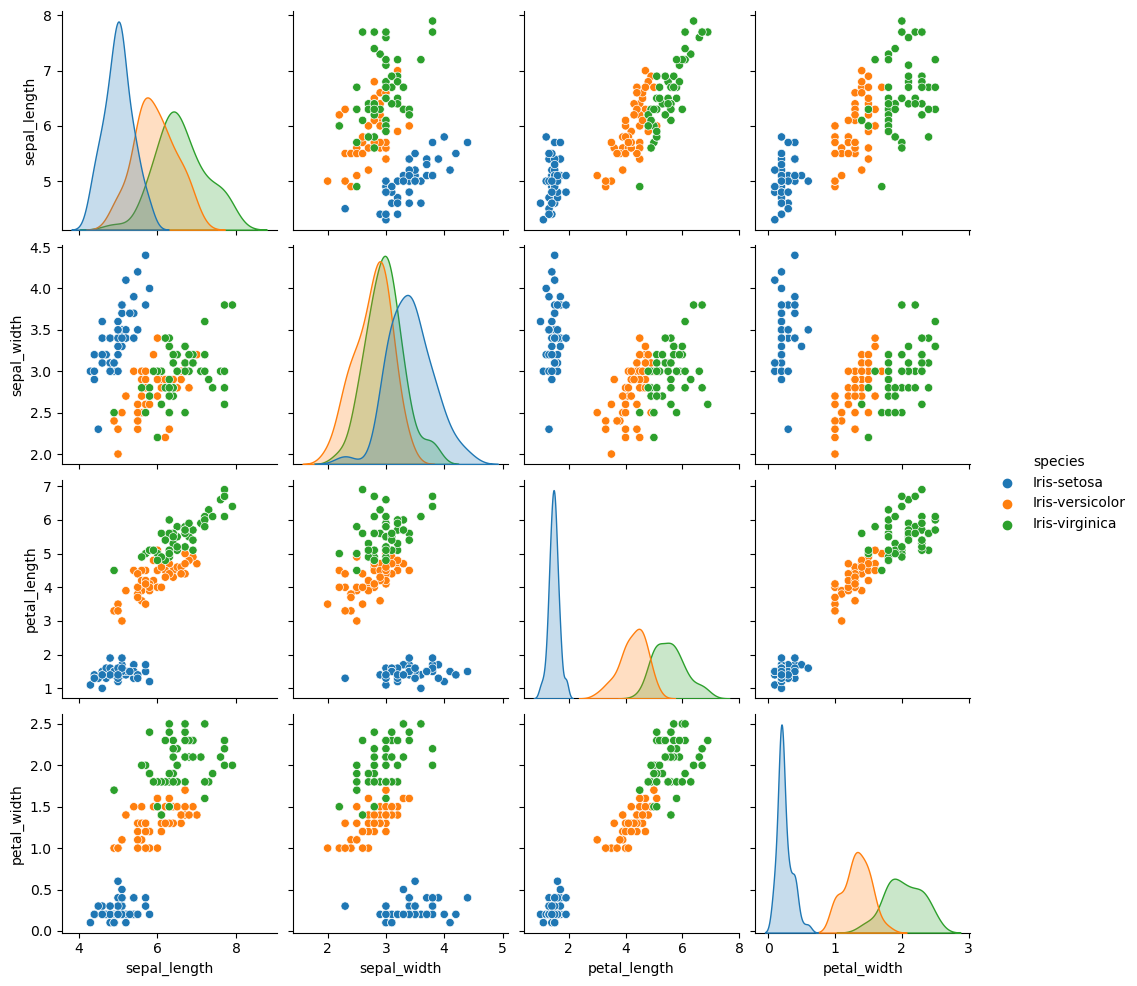

In [16]:
sns.pairplot(data=df, hue='species');

### Insights
- bottom-left four plots are worth looking (Petal vs Sepal).
- all four plots show that **Iris Flowers** are almost linearly separable.
- let's prove the above hypothesis by a model.

# Train a Model

## Transform the target variable to Numerical

In [17]:
df['species'] = df['species'].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

## Split Data into Features and Class

In [19]:
# First Shuffle the data
df = df.sample(frac=1, random_state=42)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,2
55,5.7,2.8,4.5,1.3,1
79,5.7,2.6,3.5,1.0,1
5,5.4,3.9,1.7,0.4,0
148,6.2,3.4,5.4,2.3,2


In [20]:
# Now split into features and target
X = df.drop(columns=['species'])
y = df['species']

## Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

print(f'Training Score: {dt_clf.score(X_train, y_train) * 100:.2f} %')
print(f'Test Score: {dt_clf.score(X_test, y_test) * 100:.2f} %')

Training Score: 100.00 %
Test Score: 100.00 %


Let's **Cross Validate** the model.

In [32]:
from sklearn.model_selection import cross_val_score

train_score = cross_val_score(dt_clf, X_train, y_train, cv=5)
print(f"Cross Validation Score: {train_score.mean() * 100:.2f} % ")

Cross Validation Score: 93.72 % 


In [33]:
print(f"Test Score: {dt_clf.score(X_test, y_test) * 100:.2f} %")

Test Score: 100.00 %


### Explanation
- Test is result is 100 % because the test data don't have those samples which can made the model to falsely predict.
- Otherwise cross validation would not be 93.72 %

## Logistic Regression
Let's try Logistic Regression and see how much effective is that over Iris Dataset.

In [34]:
# Let's split the data to train and test part a bit differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

In [35]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)

print(f'Training Score: {logistic_clf.score(X_train, y_train) * 100:.2f} %')
print(f'Test Score: {logistic_clf.score(X_test, y_test) * 100:.2f} %')

Training Score: 96.85 %
Test Score: 95.65 %


# Conclusion

- **Decision Tree Classifier** and **Logistic Regression** both perform well on **Iris Flowers Dataset**.
- From the last **Logistic Regression** model accuracy it is proved that **Iris Flowers** are almost linearly separable.